<a href="https://colab.research.google.com/github/Yasmine-edl/Math-matiques-statistiques/blob/main/Algebre_lin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Activité 1] Coût de production :


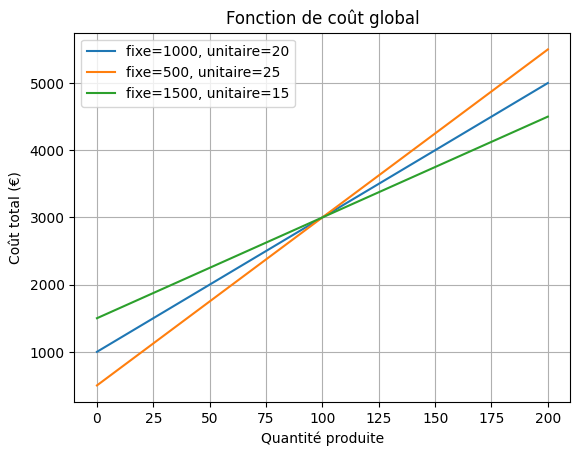


[Activité 2] Produit matrice-vecteur et inverse :
Produit : [22  8]
Inverse :
 [[ 0.33333333 -0.66666667]
 [-0.16666667  0.83333333]]
Résolution système : (np.float64(2833.0), np.float64(-1291.67))

[Activité 3] Tester type de système :
Système indéterminé (infinité de solutions)

[Activité 4] Résolution grand système :
[2.5 1.5 1.5]

[Activité 5] Optimisation simplexe :
{'x (produit A)': np.float64(6.4), 'y (produit B)': np.float64(4.799999999999997), 'Profit max': 287.99999999999994}


In [2]:
# algebre_lineaire.py

import numpy as np

# Activité 1 : Coût de production

def cout_total(cout_fixe, cout_unitaire, quantite):
    return cout_fixe + cout_unitaire * quantite

def tracer_cout():
    import matplotlib.pyplot as plt
    quantites = np.arange(0, 201)
    courbes = [
        (1000, 20),  # fixe = 1000€, unitaire = 20€
        (500, 25),
        (1500, 15)
    ]
    for fixe, unitaire in courbes:
        couts = cout_total(fixe, unitaire, quantites)
        plt.plot(quantites, couts, label=f"fixe={fixe}, unitaire={unitaire}")
    plt.xlabel("Quantité produite")
    plt.ylabel("Coût total (€)")
    plt.title("Fonction de coût global")
    plt.grid(True)
    plt.legend()
    plt.show()

# Activité 2 : Matrices et vecteurs

def produit_matrice_vecteur(A, v):
    return np.dot(A, v)

def test_inverse(A):
    return np.linalg.inv(A)

def resoudre_systeme(A, B):
    X = np.linalg.solve(A, B)
    x_arrondi = np.floor(X[0])
    y_arrondi = round(X[1], 2)
    return x_arrondi, y_arrondi

# Activité 3 : Solutions d’équations

def tester_systeme(A, B):
    rang_A = np.linalg.matrix_rank(A)
    rang_AB = np.linalg.matrix_rank(np.c_[A, B])
    n = A.shape[1]
    if rang_A != rang_AB:
        return "Système incompatible (aucune solution)"
    elif rang_A == rang_AB < n:
        return "Système indéterminé (infinité de solutions)"
    else:
        solution = np.linalg.solve(A, B)
        return f"Solution unique : {solution}"

# Activité 4 : Résolution grand système

def resoudre_grand_systeme():
    A = np.array([[1, 3, 2], [2, 1, 1], [1, 1, 2]])
    B = np.array([10, 8, 7])
    if np.linalg.matrix_rank(A) == np.linalg.matrix_rank(np.c_[A, B]):
        solution = np.linalg.solve(A, B)
        return solution
    else:
        return "Pas de solution unique."


# Activité 5 : Optimisation (simplexe)

def simplexe_optimisation():
    from scipy.optimize import linprog
    # Max Z = 30x + 20y → Minimize -Z
    c = [-30, -20]
    A = [[1, 2], [3, 1]]
    b = [16, 24]
    result = linprog(c, A_ub=A, b_ub=b, method='highs')
    if result.success:
        return {
            "x (produit A)": result.x[0],
            "y (produit B)": result.x[1],
            "Profit max": -result.fun
        }
    else:
        return "Optimisation échouée."

# Main

if __name__ == "__main__":
    print("[Activité 1] Coût de production :")
    tracer_cout()

    print("\n[Activité 2] Produit matrice-vecteur et inverse :")
    A = np.array([[5, 4], [1, 2]])
    v = np.array([2, 3])
    print("Produit :", produit_matrice_vecteur(A, v))
    print("Inverse :\n", test_inverse(A))
    print("Résolution système :", resoudre_systeme(A, np.array([9000, 250])))

    print("\n[Activité 3] Tester type de système :")
    A = np.array([[1, 2], [2, 4]])
    B = np.array([3, 6])
    print(tester_systeme(A, B))

    print("\n[Activité 4] Résolution grand système :")
    print(resoudre_grand_systeme())

    print("\n[Activité 5] Optimisation simplexe :")
    print(simplexe_optimisation())
